# Dog breed classification #

Welcome to this assignment. In this asignment you will try to predict the type of dog (breed).<br>

In [33]:
import pandas as pd
url = 'https://raw.githubusercontent.com/bbozon/DataScience/refs/heads/main/generated_dogs.csv'
'''
The dataset consists of 10000 dogs who died of old age. It is generated using meta data from dogs.

'''
df = pd.read_csv(url)
df.head()

,Breed,Gender,Age_time_of_death,Height,Weight,Likes,Skills
0,Border Collie,Male,13.3,20.70,40.50,likes_people_better_than_dogs,high_trainability
1,Basset Hound,Male,12.7,13.65,51.02,likes_dogs_better_than_people,no_special_skills
2,Dachshund,Female,14.0,8.59,24.58,likes_dogs_better_than_people,barks_like_hell
3,Boston Terrier,Male,12.3,16.27,20.13,likes_people_better_than_dogs,no_special_skills
4,Chihuahua,Male,15.3,7.14,5.92,likes_dogs_better_than_people,barks_like_hell


# First step #


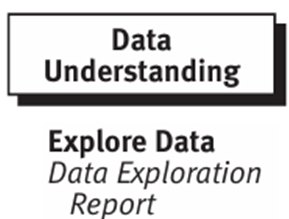


I will help you a little bit. We could try a pairplot.

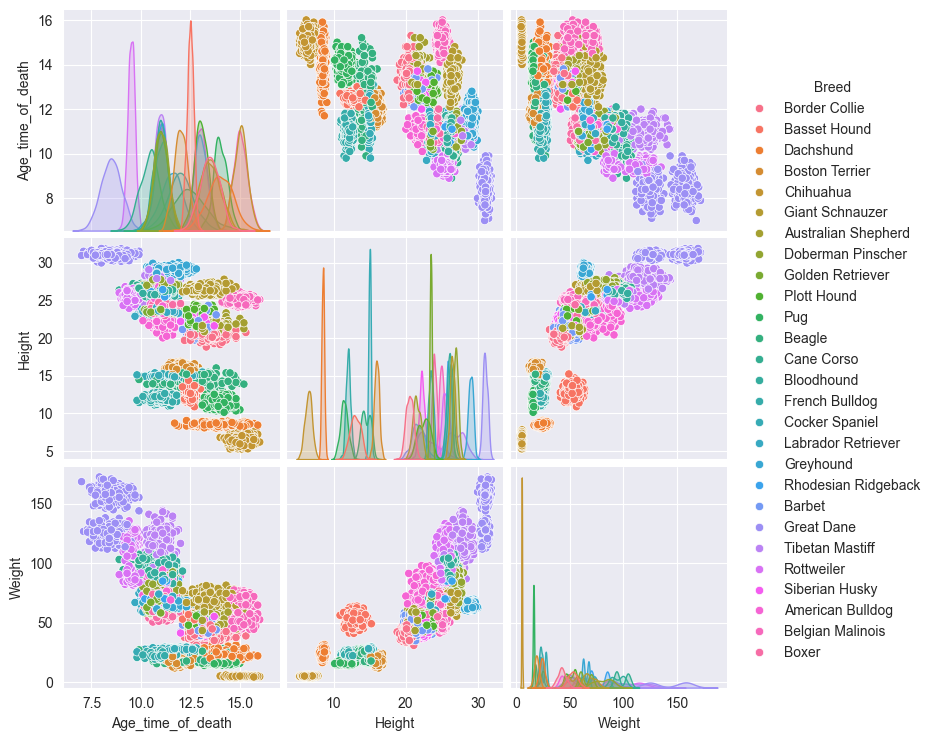

In [34]:
import seaborn as sns

sns.pairplot(df.drop(['Gender','Skills','Likes'],axis=1), hue='Breed')

1) Try different visualisations

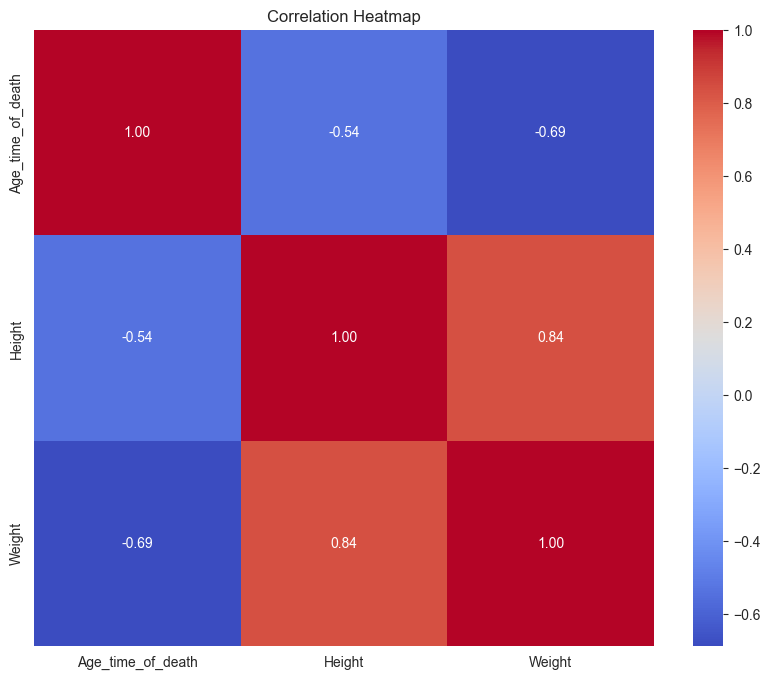

In [35]:
import matplotlib.pyplot as plt

# Correlation heatmap
# drop non-numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

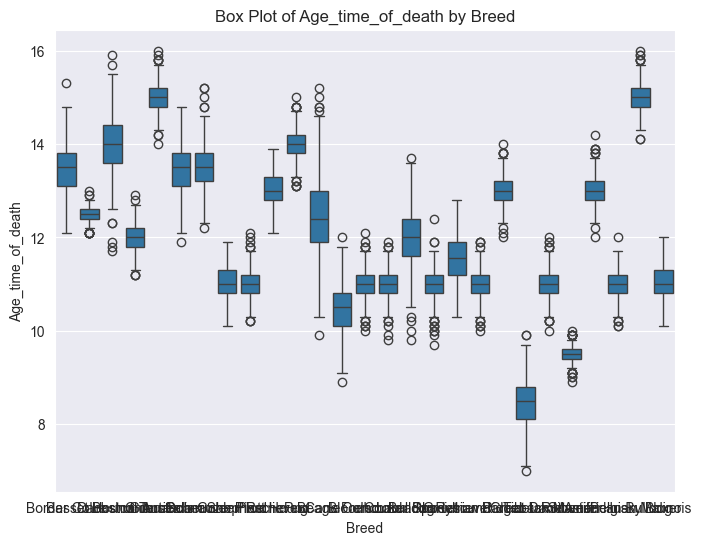

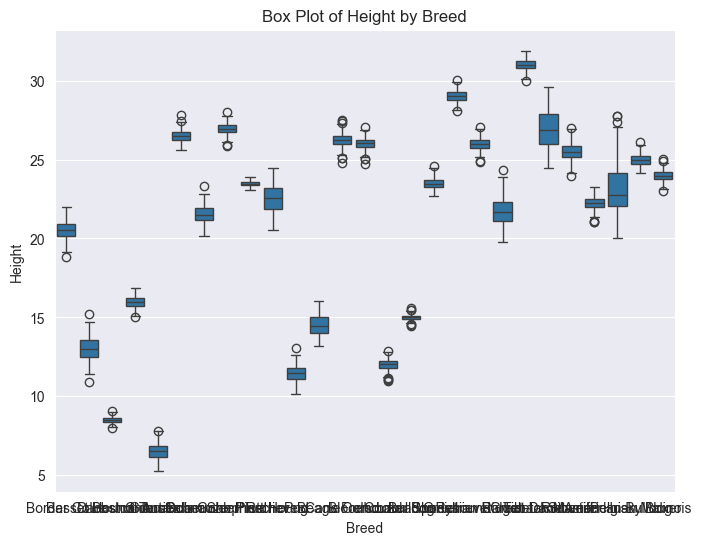

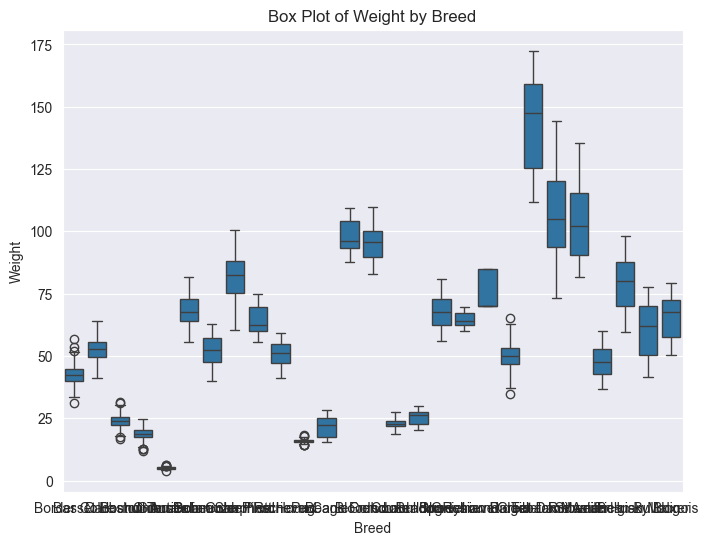

In [36]:
# Box plots for each numeric feature grouped by Breed
numeric_columns = numeric_df.columns.tolist()
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Breed', y=column, data=df)
    plt.title(f'Box Plot of {column} by Breed')
    plt.show()

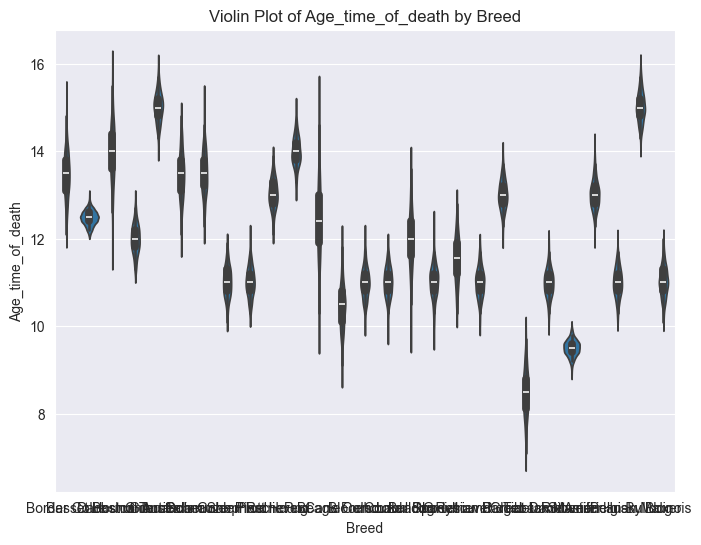

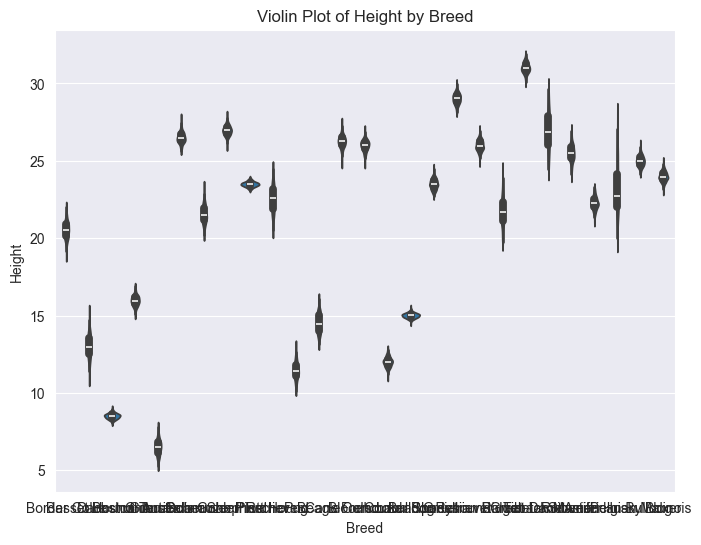

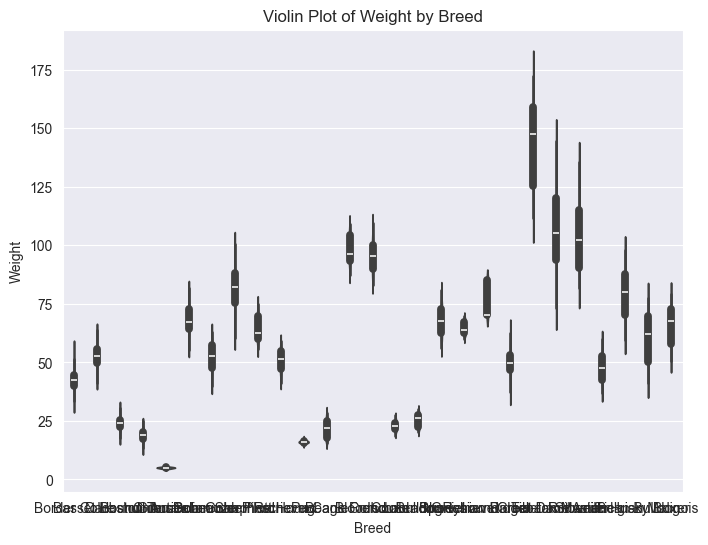

In [37]:
# Violin plots for each numeric feature grouped by Breed
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Breed', y=column, data=df)
    plt.title(f'Violin Plot of {column} by Breed')
    plt.show()

# Second step #

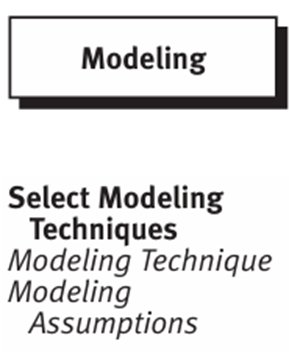

1) Select different models

In [38]:
# I will first try knn model

# Third step #

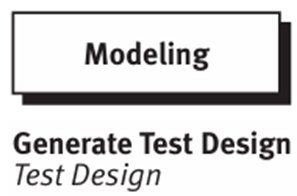

1) use scaling or not, drop columns or not, use _get_dummies or not.
2) Split your dataset in training, validation, and test.

In [39]:
# split Breed as y and rest as X
y = df['Breed']
X = df.drop('Breed', axis=1)

# split the data into train, validation, and test sets
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# convert categorical variables to dummy variables
X_train_convert = pd.get_dummies(pd.DataFrame(X_train, columns=X_train.columns))
X_val_convert = pd.get_dummies(pd.DataFrame(X_val, columns=X_val.columns))
X_test_convert = pd.get_dummies(pd.DataFrame(X_test, columns=X_test.columns))

# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_convert)
X_val_scaled = scaler.transform(X_val_convert)
X_test_scaled = scaler.transform(X_test_convert)

# Fourth step #

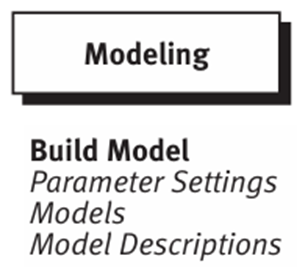

1) Apply your models.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


# Fifth step #
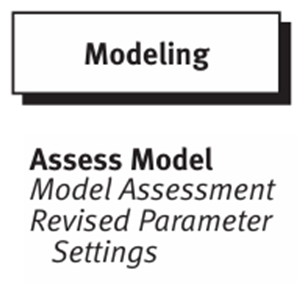

1) Assess your models.

0.963


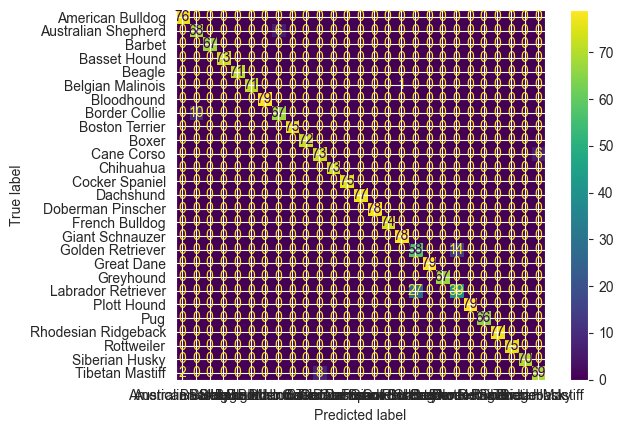

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Predict the labels of the validation set
pred = model.predict(X_val_scaled)

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_val, pred)
print(accuracy_score(y_val, pred))



In [42]:
# accuracy score of the test dataset
pred_test = model.predict(X_test_scaled)
print("Test accuracy:", accuracy_score(y_test, pred_test))

Test accuracy: 0.9635


# And repeat!!!! #
1) Go back to 1st, 2nd or 3rd step and improve your results!



Validation accuracy (Decision Tree): 0.9545
Test accuracy (Decision Tree): 0.9585


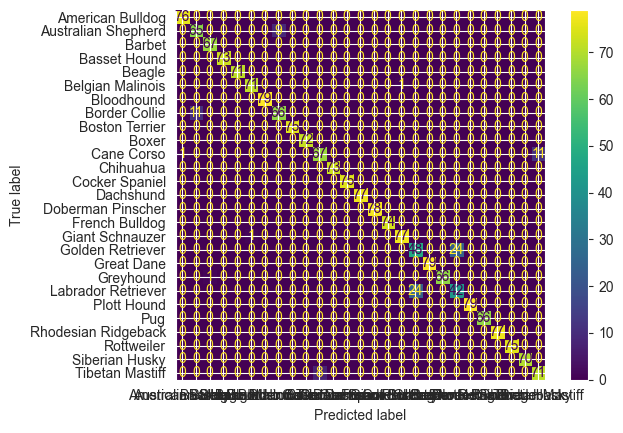

In [47]:
# now using decision tree
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_scaled, y_train)
pred_dt = model_dt.predict(X_val_scaled)
print("Validation accuracy (Decision Tree):", accuracy_score(y_val, pred_dt))

# accuracy score of the test dataset
pred_test_dt = model_dt.predict(X_test_scaled)
print("Test accuracy (Decision Tree):", accuracy_score(y_test, pred_test_dt))

# Confusion Matrix for Decision Tree
ConfusionMatrixDisplay.from_predictions(y_val, pred_dt)
plt.show()

Validation accuracy (Random Forest): 0.9675
Test accuracy (Random Forest): 0.972


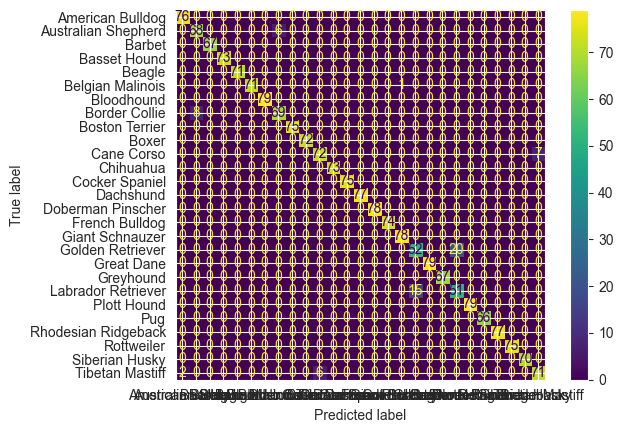

In [48]:
# now using random forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)
pred_rf = model_rf.predict(X_val_scaled)
print("Validation accuracy (Random Forest):", accuracy_score(y_val, pred_rf))

# accuracy score of the test dataset
pred_test_rf = model_rf.predict(X_test_scaled)
print("Test accuracy (Random Forest):", accuracy_score(y_test, pred_test_rf))

# Confusion Matrix for Random Forest
ConfusionMatrixDisplay.from_predictions(y_val, pred_rf)
plt.show()